# Keras Simple autopilot Demo RObot!

In [3]:
# needed for matplotlib in jupyter notebook
%matplotlib inline

# import required modules
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
import pandas as pd
import os

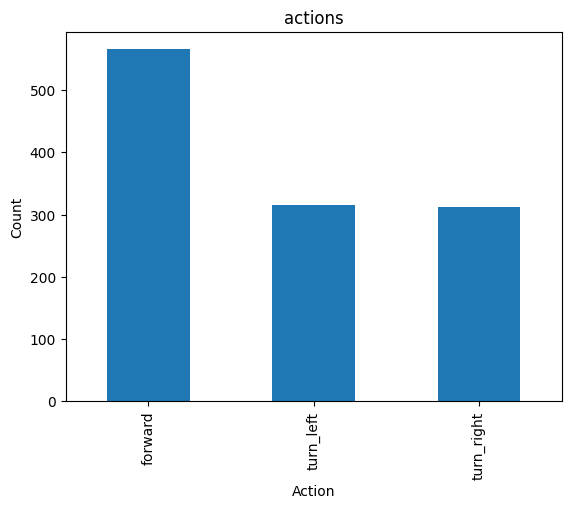

In [5]:
# prepare data
data = pd.read_csv(os.path.join('..', 'source', 'logs', '20200904-165427.log'))
data.shape
data = data[data.all_stop != 'all_stop']
data = data[data.all_stop != 'backward']
data_forward_length =  data[data.all_stop == 'forward'].shape[0]
data_random_forward = data[data.all_stop == 'forward'].sample(n=int(data_forward_length*0.9))
data.drop(data_random_forward.index,inplace=True)
data['all_stop'].value_counts().plot(kind='bar')
plt.title('actions')
plt.xlabel('Action')
plt.ylabel('Count')

image_size = 64

data = data.sample(frac=1).reset_index(drop=True)



In [6]:
# split into training and test data (10% test data)
data_test = data.sample(n=int(data.shape[0]/10))
data.drop(data_test.index,inplace=True)

#labels

conv_labels = [0 if values == 'forward' else values for values in data.all_stop ]
conv_labels = [1 if values == 'turn_left' else values for values in conv_labels ]
conv_labels = [2 if values == 'turn_right' else values for values in conv_labels ]

labels = conv_labels

#labels test 
conv_labels = [0 if values == 'forward' else values for values in data_test.all_stop ]
conv_labels = [1 if values == 'turn_left' else values for values in conv_labels ]
conv_labels = [2 if values == 'turn_right' else values for values in conv_labels ]

labels_test = conv_labels
print(len(labels_test))
print(len(labels))

119
1074


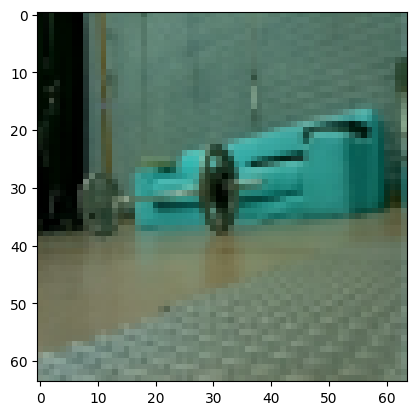

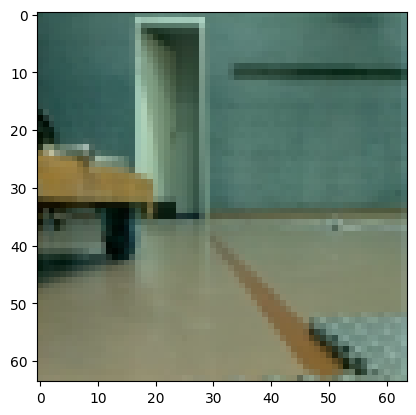

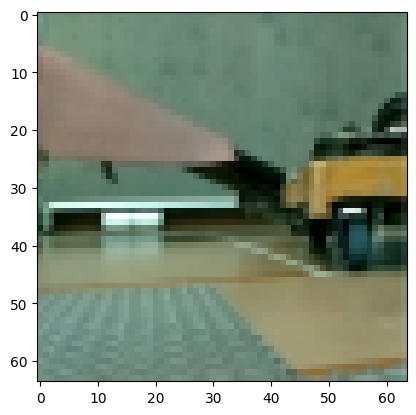

In [7]:
# convert image data
train = data.drop([ 'all_stop'],axis=1).values
test = data_test.drop([ 'all_stop'],axis=1).values

train = train.reshape(train.shape[0],image_size,image_size,3)
test = test.reshape(test.shape[0],image_size,image_size,3)

for i in range(0,3):
    plt.imshow(train[i])
    plt.show()

## Data preparation

In [8]:
# create a train and test set

x_train = train.astype('float32') / 255
x_test = test.astype('float32') / 255

# convert classes to one-hot encoding
num_classes = 3
y_train = keras.utils.to_categorical(labels, num_classes)
y_test = keras.utils.to_categorical(labels_test, num_classes)
print("one-hot labels:\n", y_train[:3])


one-hot labels:
 [[1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]


## Training

In [9]:
# create model
model = Sequential([
    Conv2D(32, 3, activation='relu', input_shape=(image_size, image_size, 3)),
    Conv2D(128, 3, activation='relu'),
    MaxPooling2D(),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       


2024-06-16 11:46:31.204670: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-06-16 11:46:31.205301: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 128)       36992     
                                                                 
 max_pooling2d (MaxPooling2  (None, 30, 30, 128)       0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 30, 30, 128)       0         
                                                                 
 flatten (Flatten)           (None, 115200)            0         
                                                                 
 dense (Dense)               (None, 128)               14745728  
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 3)                 387       
          

In [10]:
# fit model to training data
model.fit(x_train, y_train, validation_split=0.2, epochs=10)

Epoch 1/10
27/27 [==============================] - 8s 274ms/step - loss: 1.8865 - accuracy: 0.4470 - val_loss: 0.9424 - val_accuracy: 0.5767
Epoch 2/10
27/27 [==============================] - 7s 270ms/step - loss: 0.7216 - accuracy: 0.6717 - val_loss: 0.5109 - val_accuracy: 0.8372
Epoch 3/10
27/27 [==============================] - 7s 270ms/step - loss: 0.4452 - accuracy: 0.8440 - val_loss: 0.3351 - val_accuracy: 0.8744
Epoch 4/10
27/27 [==============================] - 7s 271ms/step - loss: 0.2791 - accuracy: 0.8882 - val_loss: 0.3153 - val_accuracy: 0.8837
Epoch 5/10
27/27 [==============================] - 7s 276ms/step - loss: 0.2132 - accuracy: 0.9208 - val_loss: 0.3223 - val_accuracy: 0.8698
Epoch 6/10
27/27 [==============================] - 8s 299ms/step - loss: 0.1540 - accuracy: 0.9476 - val_loss: 0.2649 - val_accuracy: 0.9070
Epoch 7/10
27/27 [==============================] - 8s 291ms/step - loss: 0.1384 - accuracy: 0.9558 - val_loss: 0.2404 - val_accuracy: 0.9116
Epoch 

## Evaluation

In [11]:
# evaluate model
score = model.evaluate(x_test, y_test)
print('Test accuracy:', score)

4/4 [==============================] - 0s 48ms/step - loss: 0.1734 - accuracy: 0.9496
Test accuracy: [0.17339999973773956, 0.9495798349380493]


In [17]:
model.save(os.path.join('..', 'models', 'robot_model.keras'))
